In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import contextily as ctx
#FR: © EuroGeographics pour les limites administratives
#https://ec.europa.eu/eurostat/web/gisco/geodata/administrative-units/communes

In [2]:
senateurs = pd.read_csv("C:/Users/sylva/OneDrive/Bureau/senat/Data/senateur_for_map.csv")

In [3]:
pd.options.plotting.backend='plotly'

In [4]:
data_dir = "C:/Users/sylva/OneDrive/Bureau/senat/eurostat/"
path_rg = data_dir + "COMM_RG_01M_2016_4326.geojson"
gdf_rg = gpd.read_file(path_rg)
#path_bn = data_dir + "COMM_BN_01M_2016_4326.geojson"
#gdf_bn = gpd.read_file(path_bn)
path_lb = data_dir + "COMM_LB_2016_4326.geojson"
gdf_lb = gpd.read_file(path_lb)



In [5]:
data_dir_country = data_dir + "country/"
path_country = data_dir_country + "CNTR_BN_20M_2020_4326_COASTL.geojson"
gdf_country = gpd.read_file(path_country)

In [6]:
gdf_lb = gdf_lb.set_index("NAME_ASCI")

In [7]:
#gdf_rg

In [8]:
paris = gdf_lb[gdf_lb.index=="Paris 1er Arrondissement"]

In [9]:
gdf_lb["distance"] = gdf_lb["geometry"].distance(paris["geometry"][0])

C:\Users\sylva\anaconda3\envs\senateur\Lib\site-packages\geopandas\geoseries.py:648: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val = getattr(super(), mtd)(*args, **kwargs)
C:\Users\sylva\AppData\Local\Temp\ipykernel_14264\2340235212.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_lb["distance"] = gdf_lb["geometry"].distance(paris["geometry"][0])


In [10]:
years = list(range(1799, 1816))

In [26]:
dic_annee={}
for annee in years:#senateurs[senateurs[str(annee)].notna() & 
    senateur_year = senateurs[senateurs["nom_local"+str(annee)]!="Paris"][["nom_local"+str(annee), "position_sociale"]]
    dic_annee[annee]=pd.merge(gdf_lb, senateur_year, right_on="nom_local"+str(annee), left_index=True, how = "right")

In [27]:
#dic_annee

In [14]:
gdf_lb["CNTR_CODE"].unique()

array(['FR', 'PT', 'IS', 'ES', 'IE', 'FO', 'UK', 'BE', 'AD', 'NL', 'NO',
       'CH', 'DE', 'IT', 'DK', 'LU', 'LI', 'AT', 'SI', 'CZ', 'MT', 'HR',
       'PL', 'SE', 'VA', 'HU', 'SK', 'RO', 'LT', 'LV', 'FI', 'MK', 'UA',
       'EL', 'BG', 'RS', 'AL', 'XK', 'EE', 'MD', 'CY', 'GL', 'GI', 'SM',
       'MC', 'FK', 'BL'], dtype=object)

In [15]:
#gdf_for_bounds[gdf_for_bounds["LAT"]==min(gdf_for_bounds["LAT"])]

In [16]:
gdf_for_bounds = gdf_lb[~gdf_lb["CNTR_CODE"].isin(["FR", "UA", "DK", "GL", "FK", "BL", "PT", "ES", "IS"])]
minx, miny, maxx, maxy = gdf_for_bounds.total_bounds

In [17]:
gdf_for_bounds[gdf_for_bounds["LON"]==min(gdf_for_bounds["LON"])]

,id,COMM_ID,CNTR_ID,LAT,LON,CNTR_CODE,COMM_NAME,TRUE_FLAG,NSI_CODE,NAME_NSI,NAME_LATN,NUTS_CODE,FID,geometry,distance
NAME_ASCI,,,,,,,,,,,,,,,
Dunquin#Dun Chaoin,IE2503077073,IE2503077073,IE,52.127769,-10.447733,IE,Dunquin#Dún Chaoin,T,19034,Dún Chaoin / Dunquin,Dunquin#Dun Chaoin,IE053,IE2503077073,POINT (-10.44770 52.12780),13.194425


In [45]:
#ax = gdf_rg.plot(figsize=(20,15), color="gray")
#dic_annee[1801].plot(figsize=(20,15), ax=ax, color="yellow")
#gdf_bn.plot(figsize=(20,15), ax=ax, color="red")

<Figure size 640x480 with 0 Axes>

In [30]:
"""ax = gdf_country.plot(figsize=(20,15), color="gray")
dic_annee[1802].plot(figsize=(20,15), ax=ax, color="yellow")
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)"""

'ax = gdf_country.plot(figsize=(20,15), color="gray")\ndic_annee[1802].plot(figsize=(20,15), ax=ax, color="yellow")\nax.set_xlim(minx, maxx)\nax.set_ylim(miny, maxy)'

C:\Users\sylva\AppData\Local\Temp\ipykernel_5984\3865085367.py:15: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  dic_annee[years[count]].plot(figsize=(20,15), ax=axs[irow][icol], color="yellow", aspect = 1)


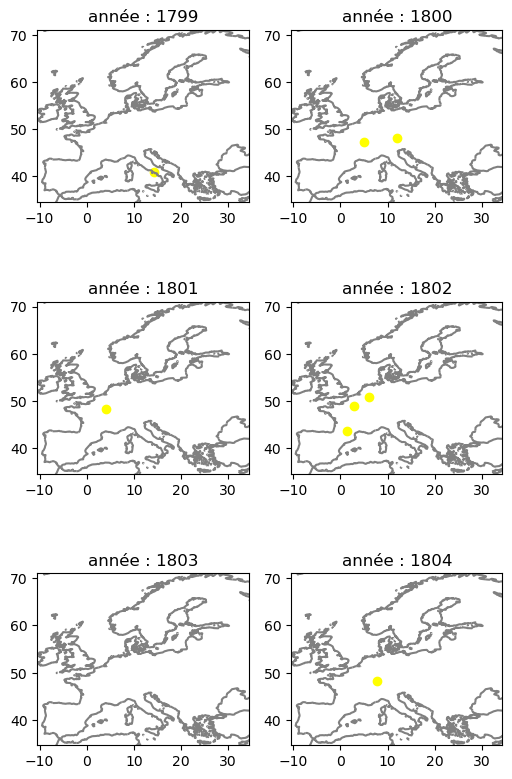

In [18]:
years_consulat = list(range(1799, 1805))
def plot_several_years(years):
    cols, rows = 2,int(len(years)/2+0.5)  #num of subplots <= (cols x rows)
    # create figure with array of axes
    fig, axs = plt.subplots(nrows=rows, ncols=cols)
    fig.set_size_inches(6, 10)  #set it big enough for all subplots
    
    count = 0
    for irow in range(axs.shape[0]):
        for icol in range(axs.shape[1]):
            #print(icol, irow)
            if count<len(years):
                # plot that country on current axes
                gdf_country.plot(figsize=(20,15), color="gray", ax=axs[irow][icol])
                dic_annee[years[count]].plot(figsize=(20,15), ax=axs[irow][icol], color="yellow", aspect = 1)
                axs[irow][icol].set_xlim(minx, maxx)
                axs[irow][icol].set_ylim(miny, maxy)
                #world[ world['iso_a3'] == years[count] ].plot(ax=axs[irow][icol])
                axs[irow][icol].set_title('année : '+str(years[count]))
                count +=1
            else:
                # hide extra axes
                axs[irow][icol].set_visible(False)
    #plt.savefig("C:/Users/sylva/OneDrive/Bureau/senat/plot/map_year")
    plt.show()

In [ ]:
plot_several_years(years_consulat)

C:\Users\sylva\AppData\Local\Temp\ipykernel_5984\3865085367.py:15: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  dic_annee[years[count]].plot(figsize=(20,15), ax=axs[irow][icol], color="yellow", aspect = 1)


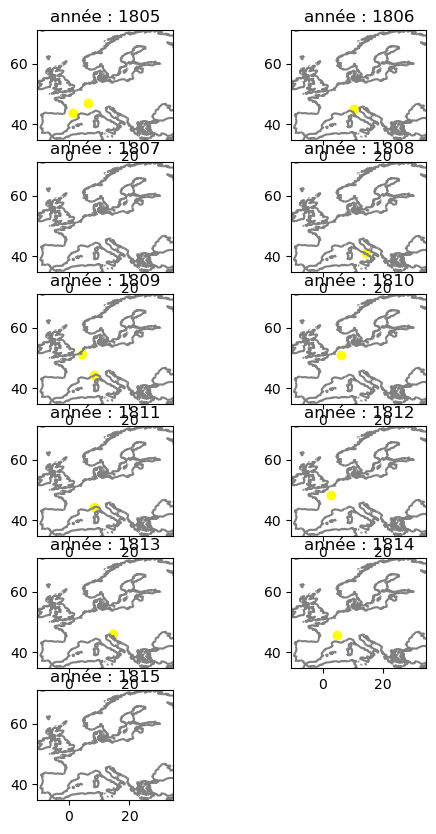

In [28]:
years_empire = list(range(1805, 1816))
plot_several_years(years_empire)

In [29]:
senateurs

,Unnamed: 0,nom_local1799,nom_local1800,nom_local1801,nom_local1802,nom_local1803,nom_local1804,nom_local1805,nom_local1806,nom_local1807,nom_local1808,nom_local1809,nom_local1810,nom_local1811,nom_local1812,nom_local1813,nom_local1814,nom_local1815,position_sociale
0,0,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,droit
1,1,Paris,Hohenlinden,Paris,Paris,Paris,Paris,Hollande,Paris,Paris,Paris,Antwerpen,Paris,Paris,Paris,Paris,Paris,Paris,négoce
2,2,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,droit
3,3,Paris,Dijon,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,noblesse
4,4,Paris,Paris,Paris,Frontière Espagne,Paris,Paris,Paris,Parma,Paris,Napoli,Paris,Paris,Paris,Paris,Paris,Paris,Paris,noblesse
5,5,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,artisan
6,6,Paris,Paris,Allemagne,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,droit
7,7,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,paysan
8,8,Napoli,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Italie,Paris,Paris,Paris,Paris,Paris,Paris,Paris,NaN
9,9,Paris,Paris,Paris,Paris,Paris,Paris,Doubs,Paris,Brest,Paris,Anvers Belgique,Paris,Paris,Paris,Paris,Paris,Paris,haute armée


In [23]:
dic_annee[1804]

,id,COMM_ID,CNTR_ID,LAT,LON,CNTR_CODE,COMM_NAME,TRUE_FLAG,NSI_CODE,NAME_NSI,NAME_LATN,NUTS_CODE,FID,geometry,distance,nom_local1804,position_sociale
12,DE083017002026,DE083017002026,DE,48.251325,7.854627,DE,Ettenheim,T,08317026,"Ettenheim, Stadt",Ettenheim,DE134,DE083017002026,POINT (7.85460 48.25130),5.552045,Ettenheim,NaN


In [24]:
dic_annee[years[1]]

,id,COMM_ID,CNTR_ID,LAT,LON,CNTR_CODE,COMM_NAME,TRUE_FLAG,NSI_CODE,NAME_NSI,NAME_LATN,NUTS_CODE,FID,geometry,distance,nom_local1800,position_sociale
1,DE091075000123,DE091075000123,DE,48.149724,11.998531,DE,Hohenlinden,T,09175123,Hohenlinden,Hohenlinden,DE218,DE091075000123,POINT (11.99850 48.14970),9.688457,Hohenlinden,négoce
3,FR27212231,FR27212231,FR,47.316639,5.032758,FR,Dijon,T,21231,Dijon,Dijon,FRC11,FR27212231,POINT (5.03280 47.31660),3.108202,Dijon,noblesse


In [7]:
#gdf_lb

,id,COMM_ID,CNTR_ID,LAT,LON,CNTR_CODE,COMM_NAME,NAME_ASCI,TRUE_FLAG,NSI_CODE,NAME_NSI,NAME_LATN,NUTS_CODE,FID,geometry
0,GP01971133,GP01971133,FR,15.959871,-61.694524,FR,Vieux-Fort,Vieux-Fort,T,97133,Vieux-Fort,Vieux-Fort,FRY10,GP01971133,POINT (-61.69450 15.95990)
1,GP01971109,GP01971109,FR,15.993794,-61.686749,FR,Gourbeyre,Gourbeyre,T,97109,Gourbeyre,Gourbeyre,FRY10,GP01971109,POINT (-61.68670 15.99380)
2,GP01971114,GP01971114,FR,16.121618,-61.613983,FR,Goyave,Goyave,T,97114,Goyave,Goyave,FRY10,GP01971114,POINT (-61.61400 16.12160)
3,GP01971219,GP01971219,FR,16.389404,-61.449915,FR,Petit-Canal,Petit-Canal,T,97119,Petit-Canal,Petit-Canal,FRY10,GP01971219,POINT (-61.44990 16.38940)
4,GP01971202,GP01971202,FR,16.476744,-61.469875,FR,Anse-Bertrand,Anse-Bertrand,T,97102,Anse-Bertrand,Anse-Bertrand,FRY10,GP01971202,POINT (-61.46990 16.47670)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122744,FR44673543,FR44673543,FR,48.512389,7.216867,FR,Wisches,Wisches,T,67543,Wisches,Wisches,FRF11,FR44673543,POINT (7.21690 48.51240)
122745,FR44673027,FR44673027,FR,48.410126,7.253041,FR,Belmont,Belmont,T,67027,Belmont,Belmont,FRF11,FR44673027,POINT (7.25300 48.41010)
122746,FR44675493,FR44675493,FR,48.343747,7.333944,FR,Triembach-au-Val,Triembach-au-Val,T,67493,Triembach-au-Val,Triembach-au-Val,FRF11,FR44675493,POINT (7.33390 48.34370)
122747,FR44675430,FR44675430,FR,48.335257,7.363046,FR,Saint-Pierre-Bois,Saint-Pierre-Bois,T,67430,Saint-Pierre-Bois,Saint-Pierre-Bois,FRF11,FR44675430,POINT (7.36300 48.33530)
